In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
dataset=pd.read_csv("/content/robotic_systems_data.csv")
dataset.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [48]:
dataset.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [50]:
dataset.shape

(136429, 14)

In [51]:
dataset.isnull().any()

id                         False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

In [52]:
dataset.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

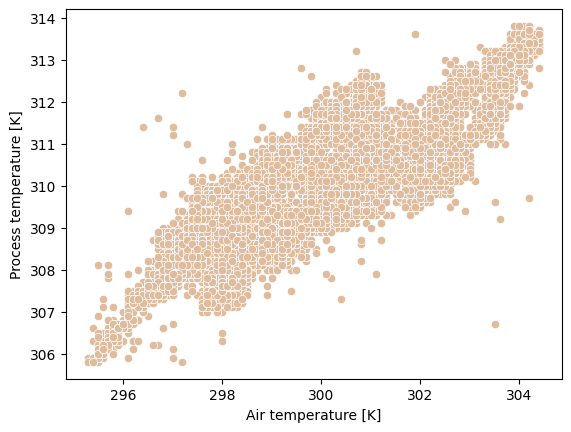

In [53]:
sns.scatterplot(data=dataset,x="Air temperature [K]",y="Process temperature [K]",color="#DFBC9E")
plt.show()

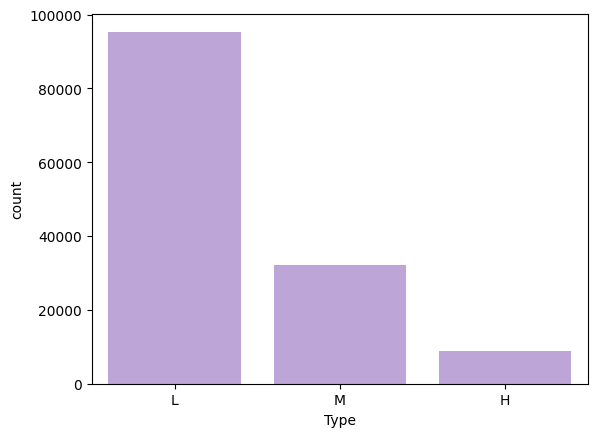

In [54]:
sns.countplot(data=dataset,x="Type",color="#BC9EDF")
plt.show()

In [55]:
dataset["Machine failure"].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [56]:
typesTrainData=pd.get_dummies(dataset["Type"],drop_first=False)
typesTrainData.head()

,H,L,M
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,False,True


In [57]:
map_values={True: 1,False: 0}
typesTrainData['H']=typesTrainData['H'].map(map_values)
typesTrainData['L']=typesTrainData['L'].map(map_values)
typesTrainData['M']=typesTrainData['M'].map(map_values)
typesTrainData.head()

,H,L,M
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [58]:
dataset=pd.concat([dataset,typesTrainData],axis=1)
dataset.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [59]:
dataset.drop(["id","Product ID","Type"],axis=1,inplace=True)
dataset.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [60]:
y=dataset['Machine failure']
dataset.drop(['Machine failure'],axis=1,inplace=True)

In [61]:
dataset.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,1


In [62]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

In [63]:
original_columns=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
new_columns={col:col.split(' [')[0] for col in original_columns}
dataset=dataset.rename(columns=new_columns)
print(dataset.columns)

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M'],
      dtype='object')


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(102321, 13) (34108, 13) (102321,) (34108,)


#**Model Building**

In [75]:
from sklearn.metrics import accuracy_score

##**XGM Classifier**

In [66]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()

In [67]:
xgb_model=XGBClassifier(n_estimators=100,objective='binary:logistic',tree_method='hist',max_depth=3,learning_rate=0.1)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred_xgb=xgb_model.predict(x_test)

In [74]:
TrainAccuracy=accuracy_score(y_train,xgb_model.predict(x_train))
TestAccuracy=accuracy_score(y_pred_xgb,y_test)
print(TrainAccuracy,TestAccuracy)

0.9960711877327235 0.9965110824440014


##**Random Forest Classifier**

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [77]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [78]:
y_pred_rf=rf_model.predict(x_test)

In [79]:
TrainAccuracy=accuracy_score(y_train,rf_model.predict(x_train))
TestAccuracy=accuracy_score(y_pred_rf,y_test)
print(TrainAccuracy,TestAccuracy)

0.9998631756921844 0.9963644892693796


##**KNN**

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [82]:
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [83]:
y_pred_knn=knn_model.predict(x_test)

In [84]:
TrainAccuracy=accuracy_score(y_train,knn_model.predict(x_train))
TestAccuracy=accuracy_score(y_pred_knn,y_test)
print(TrainAccuracy,TestAccuracy)

0.9882722021872343 0.9837574762519057


##**Logistic Regression**

In [85]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

In [86]:
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
y_pred_lr=lr_model.predict(x_test)

In [88]:
TrainAccuracy=accuracy_score(y_train,lr_model.predict(x_train))
TestAccuracy=accuracy_score(y_pred_lr,y_test)
print(TrainAccuracy,TestAccuracy)

0.9950743249186385 0.9949278761580861


##**Decision Tree Classifier**

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [90]:
dt_model=DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_split=4,random_state=0)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=4,
                       random_state=0)

In [91]:
y_pred_dt=dt_model.predict(x_test)

In [95]:
TrainAccuracy=accuracy_score(y_train,dt_model.predict(x_train))
TestAccuracy=accuracy_score(y_pred_dt,y_test)
print(TrainAccuracy,TestAccuracy)

0.9948593152920711 0.9946053711739181


##**SVC**

In [93]:
from sklearn.svm import SVC
svc_model=SVC()

In [94]:
svc_model=SVC(random_state=0)
svc_model.fit(x_train,y_train)

SVC(random_state=0)

In [96]:
y_pred_svc=svc_model.predict(x_test)

In [97]:
TrainAccuracy=accuracy_score(y_train,svc_model.predict(x_train))
TestAccuracy=accuracy_score(y_pred_svc,y_test)
print(TrainAccuracy,TestAccuracy)

0.9843433899199577 0.9839920253313006


In [110]:
rf_model.predict([[299.8,8010.3,1427,36.4,0,0,0,0,0,0,0,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [111]:
y_train

70139     0
76714     0
83639     0
130124    0
78861     0
         ..
41993     0
97639     0
95939     1
117952    0
43567     0
Name: Machine failure, Length: 102321, dtype: int64

In [112]:
import pickle
pickle.dump(rf_model,open('model.pkl','wb'))